In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/My Drive/IBM/Ass 3'

/content/drive/My Drive/IBM/Ass 3


In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

# Image Augmentation 

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
xtrain = train_datagen.flow_from_directory('/content/drive/MyDrive/IBM/Ass 3/flowers/flowers',target_size=(64,64),class_mode='categorical',batch_size=100)


Found 4327 images belonging to 5 classes.


In [ ]:
xtest = test_datagen.flow_from_directory('/content/drive/MyDrive/IBM/Ass 3/flowers/flowers',target_size=(64,64),class_mode='categorical',batch_size=100)

Found 4327 images belonging to 5 classes.


# Model Creation

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [ ]:
cnn = Sequential()

# Adding Layers

##Adding Convolution Layer



In [ ]:
cnn.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
print("Layer added successfully")

Layer added successfully


##Adding MaxPooling Layer

In [ ]:
cnn.add(MaxPooling2D(pool_size=(2,2)))
print("Layer added successfully")

Layer added successfully


##Adding Flattern Layer

In [ ]:
cnn.add(Flatten())
print("Layer added successfully")

Layer added successfully


## Adding Dense Layer

In [ ]:
cnn.add(Dense(300,activation='relu')) #hiddenlayer 1
cnn.add(Dense(300,activation='relu')) #hiddenlayer 2
cnn.add(Dense(150,activation='relu')) #hiddenlayer 3
print("Layer added successfully")

Layer added successfully


## Adding Output Layer

In [ ]:
cnn.add(Dense(5,activation='softmax'))
print("Layer added successfully")

Layer added successfully


# Model Compilation

In [ ]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.fit_generator(xtrain,
                    steps_per_epoch=len(xtrain),
                    epochs=10,                
                    validation_data=xtest,
                    validation_steps=len(xtest))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10
44/44 [==============================] - 708s 16s/step - loss: 1.6092 - accuracy: 0.3547 - val_loss: 1.2490 - val_accuracy: 0.4659
Epoch 2/10
44/44 [==============================] - 34s 781ms/step - loss: 1.1457 - accuracy: 0.5267 - val_loss: 1.2371 - val_accuracy: 0.5211
Epoch 3/10
44/44 [==============================] - 34s 774ms/step - loss: 1.0574 - accuracy: 0.5761 - val_loss: 1.0196 - val_accuracy: 0.6002
Epoch 4/10
44/44 [==============================] - 34s 776ms/step - loss: 1.0049 - accuracy: 0.6034 - val_loss: 1.1017 - val_accuracy: 0.5787
Epoch 5/10
44/44 [==============================] - 35s 794ms/step - loss: 0.9455 - accuracy: 0.6305 - val_loss: 0.9864 - val_accuracy: 0.6272
Epoch 6/10
44/44 [==============================] - 34s 769ms/step - loss: 0.9189 - accuracy: 0.6395 - val_loss: 0.9209 - val_accuracy: 0.6330
Epoch 7/10
44/44 [==============================] - 34s 775ms/step - loss: 0.8769 - accuracy: 0.6621 - val_loss: 0.8840 - val_accuracy: 0.6630


# Model Saving 

In [ ]:
cnn.save('Flowers.h5')

# Model Testing

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [ ]:
img = image.load_img('/content/drive/MyDrive/IBM/Ass 3/flowers/test/sftest.jpg',target_size=(64,64))

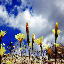

In [ ]:
img

In [ ]:
narray = image.img_to_array(img)
narray

array([[[ 63.,  88., 154.],
        [ 70.,  94., 166.],
        [ 55.,  81., 156.],
        ...,
        [176., 185., 200.],
        [173., 184., 202.],
        [181., 187., 199.]],

       [[ 18.,  45., 148.],
        [ 54.,  81., 158.],
        [ 58.,  84., 158.],
        ...,
        [179., 189., 201.],
        [187., 195., 208.],
        [186., 194., 205.]],

       [[  2.,  22., 143.],
        [ 10.,  34., 156.],
        [ 51.,  77., 172.],
        ...,
        [189., 199., 211.],
        [193., 199., 215.],
        [189., 195., 209.]],

       ...,

       [[ 29.,  33.,   6.],
        [101.,  91.,  56.],
        [103.,  66.,  22.],
        ...,
        [ 40.,  15.,  21.],
        [ 92.,  65.,  72.],
        [188., 173., 144.]],

       [[ 11.,  11.,   0.],
        [ 86.,  75.,  29.],
        [172., 158., 119.],
        ...,
        [ 45.,  45.,  11.],
        [ 25.,   7.,   7.],
        [116.,  38.,   0.]],

       [[  3.,   0.,   4.],
        [169., 163., 105.],
        [155., 1

In [ ]:
narray = np.expand_dims(narray,axis=0)
narray

array([[[[ 63.,  88., 154.],
         [ 70.,  94., 166.],
         [ 55.,  81., 156.],
         ...,
         [176., 185., 200.],
         [173., 184., 202.],
         [181., 187., 199.]],

        [[ 18.,  45., 148.],
         [ 54.,  81., 158.],
         [ 58.,  84., 158.],
         ...,
         [179., 189., 201.],
         [187., 195., 208.],
         [186., 194., 205.]],

        [[  2.,  22., 143.],
         [ 10.,  34., 156.],
         [ 51.,  77., 172.],
         ...,
         [189., 199., 211.],
         [193., 199., 215.],
         [189., 195., 209.]],

        ...,

        [[ 29.,  33.,   6.],
         [101.,  91.,  56.],
         [103.,  66.,  22.],
         ...,
         [ 40.,  15.,  21.],
         [ 92.,  65.,  72.],
         [188., 173., 144.]],

        [[ 11.,  11.,   0.],
         [ 86.,  75.,  29.],
         [172., 158., 119.],
         ...,
         [ 45.,  45.,  11.],
         [ 25.,   7.,   7.],
         [116.,  38.,   0.]],

        [[  3.,   0.,   4.],
       

In [ ]:
cnn.predict(narray)

array([[0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
xtrain.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:
op = ['daisy','dandelion','rose','sunflower','tulip']
pred = np.argmax(cnn.predict(narray))
op[pred]

'tulip'